# CMSE202-Project1 

## crime data anlyasis and predict

## introduction

**Chicago is the third largest city in the United States, with a population of over 2.7 million, and one of the oldest cities in the United States. It laid the foundation for the world's first skyscraper in 1885. However, recently, Chicago is mainly known for crime. Chicago is one of the major homicide cities. The crime rate in New York City is more than four times that in Los Angeles. Although the crime rate in Chicago has been greatly reduced in modern times and has been extensively studied, it is still very interesting. This article mainly analyzes data in a mathematically rigorous way, and researchers may be able to gain insight into the root causes of crime and also be able to identify indicators of possible future crime. All these classifications and analyses belong to the category of data science, which uses probabilistic and statistical data to analyze large amounts of data and draw useful conclusions from the analysis. In this article, it is mainly divided into two points. One is conclusions are drawn from the analysis and compilation of data from 2015 to 2020. For example, a series of analyses on the types of crimes. Secondly, we use the machine learning model to simulate the entire criminal record. We also predict crime**

In [1]:
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Chicago_violent_crime_map.svg", width=320, heigth=240>

## Import Python library

In [2]:
## this part is data analyze 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

**These data sets are publicly available through the Chicago City website. The information provided by this dataset is very comprehensive, including information about the date and time of the crime, the location of the crime, and the type of crime. In this assignment, we will focus on time crime and crime type classification.**

### 1. Read a file

In [3]:
data =  pd.read_csv("crimes_2015_2020.csv" , na_values = [None, 'NaN','Nothing'], header = 0) # the data is the 2015 data to 2020 
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10179775,HY368117,01/01/2015 12:00:00 AM,022XX S SAWYER AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,12.0,30.0,02,1155042.0,1888945.0,2015,04/04/2020 03:44:34 PM,41.851074,-87.70645,"(41.851074338, -87.706449961)"
1,11768614,JC361321,01/01/2015 12:00:00 AM,030XX W 41ST ST,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,12.0,58.0,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
2,11752913,JC342515,01/01/2015 12:00:00 AM,030XX W 41ST ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,12.0,58.0,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
3,11993485,JD166700,01/01/2015 12:00:00 AM,095XX S BENNETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,7.0,51.0,11,NaN,NaN,2015,02/28/2020 03:48:46 PM,NaN,NaN,NaN
4,11269813,JB195608,01/01/2015 12:00:00 AM,029XX N LOWELL AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,31.0,20.0,02,NaN,NaN,2015,02/25/2020 03:47:28 PM,NaN,NaN,NaN


### 2. Drop meaningless and empty columns

In [4]:
data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [5]:
data.drop_duplicates(subset = ['Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True,)

### 3. Create data variables

In [6]:
data.Date = pd.to_datetime(data.Date, format = '%m/%d/%Y %I:%M:%S %p')
data.index = pd.DatetimeIndex(data.Date)

In [7]:
data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])

## Data Analysis and Visualization

### 1. The number of crimes per year

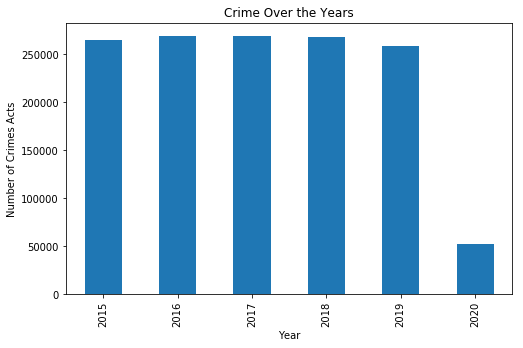

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [8]:
plt.figure(figsize = (8,5))
data.groupby([data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')

plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))

### 2. The number of crimes per month

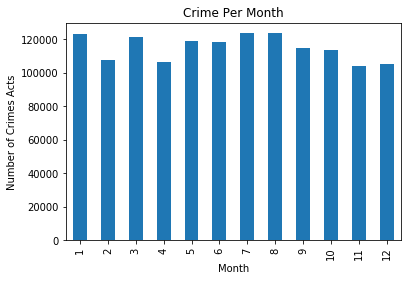

In [9]:
data.groupby([data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()

### 3. The number of crimes per day

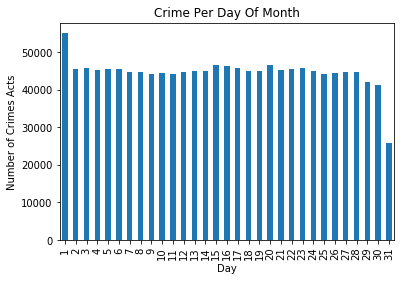

In [10]:
data.groupby([data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

### 4. The number of crimes occured in different time

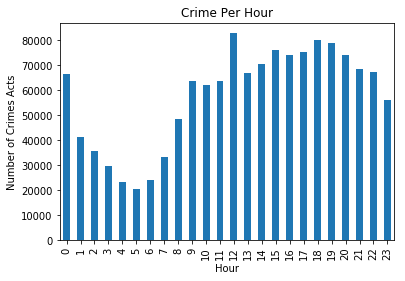

In [11]:
data.groupby([data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

**Result：**

**From the part 1 to 4 , we roughly understand the distribution of crime time. In the past five years (except 2020), the number of crimes is about the same every year, and the number of crimes decreased significantly in February, April, November, and December. There are also a relatively small number from 2 to 8 o'clock every day, and more time in the rest**

### 5 . Top 10 Location where crime occurs and Choropleth map crimes

Location Description
STREET                            308660
RESIDENCE                         230331
APARTMENT                         180335
SIDEWALK                          117138
OTHER                              56284
PARKING LOT/GARAGE(NON.RESID.)     39988
SMALL RETAIL STORE                 33896
RESTAURANT                         33202
ALLEY                              27263
RESIDENTIAL YARD (FRONT/BACK)      26752
Name: ID, dtype: int64


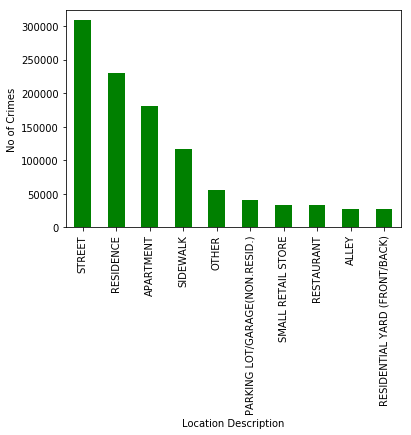

In [12]:
temp=data.groupby('Location Description')['ID'].count().sort_values(ascending=False)
temp=temp[:10]
print(temp)

temp.plot(kind='bar',color='green')
plt.ylabel('No of Crimes')
plt.show()

In [13]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [14]:
newfd='geo_5.geojson'
map2_Chicago=gpd.read_file(newfd)
map2_Chicago.rename(columns={'area_num_1':'Area_num'},inplace=True)
map2_Chicago['Area_num']=pd.to_numeric(map2_Chicago['Area_num'])

In [15]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (25,10)

In [16]:
district=pd.DataFrame(data ['Community Area'].value_counts())

district=district.reset_index().rename(columns={'index':'Area_num','Community Area':'Num_crime'})

map2=map2_Chicago.merge(district,on='Area_num')

Text(569.9092864623368, 0.5, 'latitude')

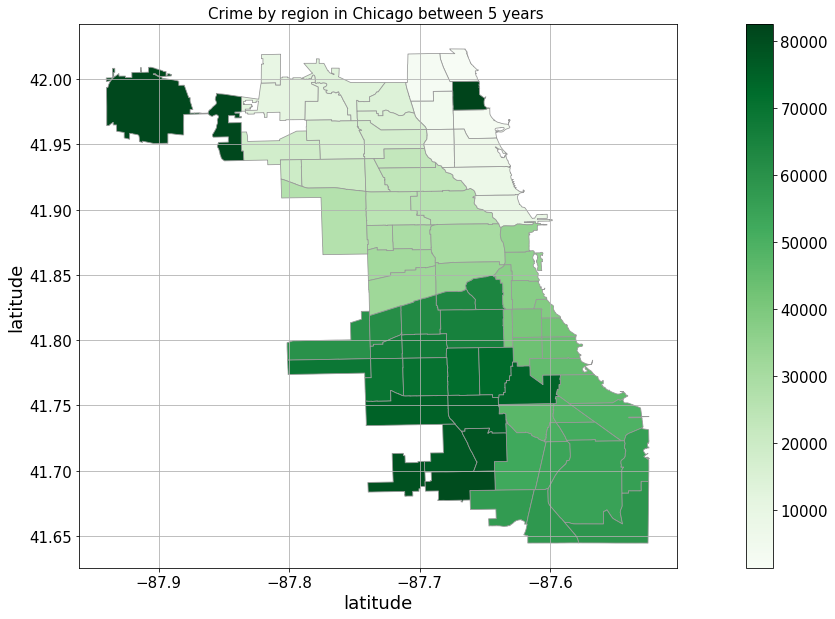

In [19]:
sm = plt.cm.ScalarMappable(cmap='Greens')

sm.norm=plt.Normalize(vmin = (min(map2['Num_crime'])),
                   vmax = (max(map2['Num_crime'])))
sm._A= []



map2.plot(column="Area_num", cmap='Greens', linewidth=0.8, edgecolor='0.6')
plt.colorbar(sm)

plt.title('Crime by region in Chicago between 5 years ')
plt.grid()
plt.xlabel("latitude")
plt.ylabel("latitude")

**Result:**
**we can observed the rank top 10 location of crime is STREET , RESIDENCE , APARTMENT , SIDEWALK  ,  OTHER , PARKINGLOT/GARAGE(NON.RESID.)  , SMALL RETAIL STORE  , RESTAURANT   , ALLEY  and RESIDENTIAL YARD (FRONT/BACK). Plot the distrubtion of This choropleth map plots where crimes happened in Chicago in 2015 t0 2019. Amoung these years, this is  the pattern of geographical distribution of crimes. From the map, we can tell crimes mostly happen in the Middle,South-West part,as well as North-Western part of Chicago. And, a police district at North-Eastern Chicago,unlike the police district around it, shows a record of huge numbers of crimes**

### 6 . Plot Primary Type on 5 years 

In [20]:
Crime_Data_date = data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = data.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

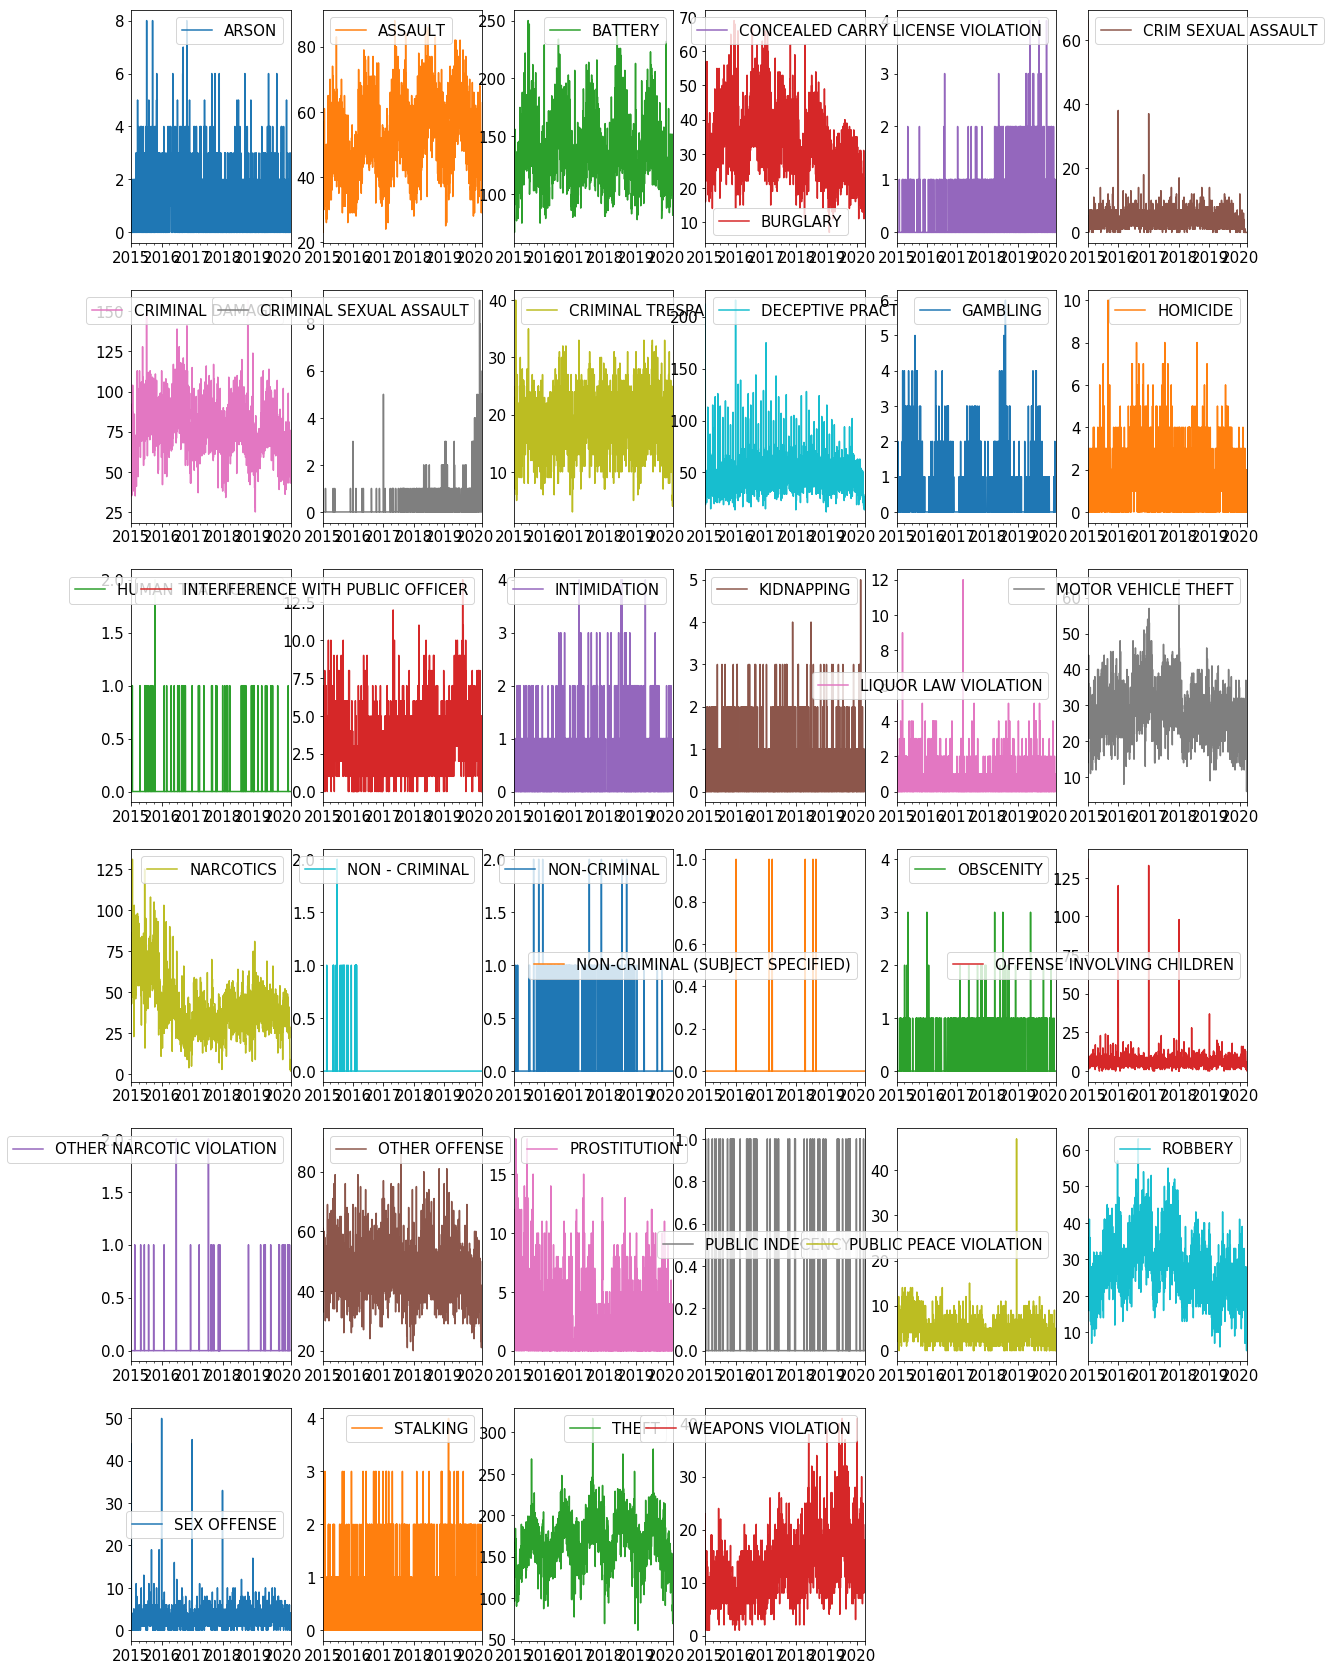

In [21]:
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

### 7. Types of crime (rating)

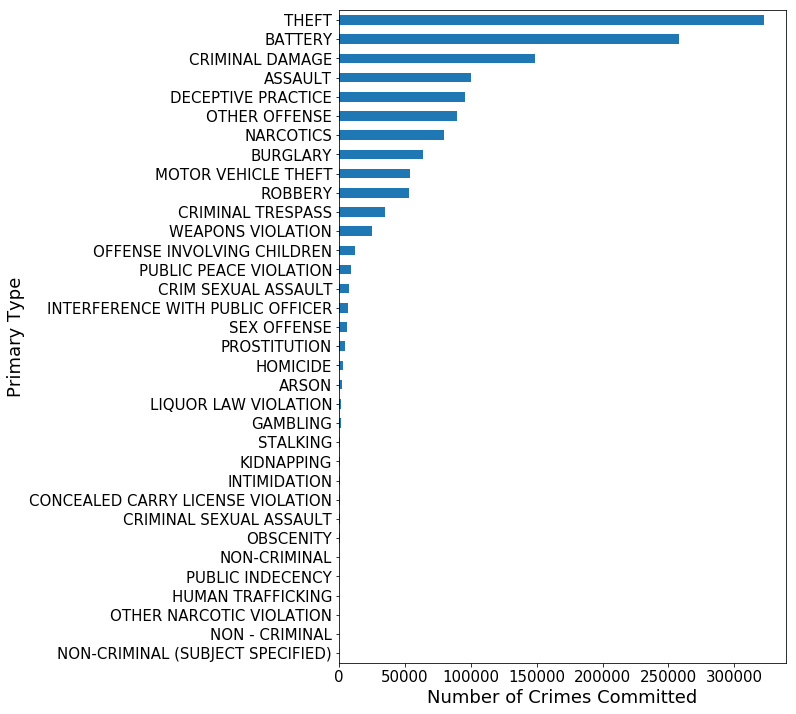

In [22]:
#the amount of each type of crime 
plt.figure(figsize = (8,12))
data.groupby(data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

### 8 . Location of different crimes

In [23]:
Crime_Data = data.dropna(axis = 0, how = 'any')

In [24]:
#make color by Description column
Groups = Crime_Data.groupby(Crime_Data['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

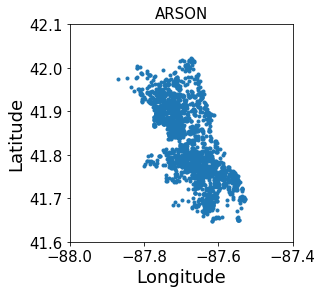

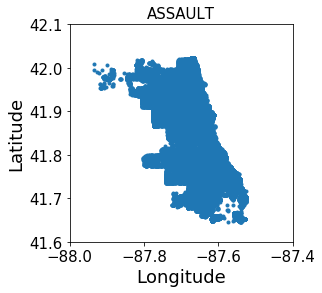

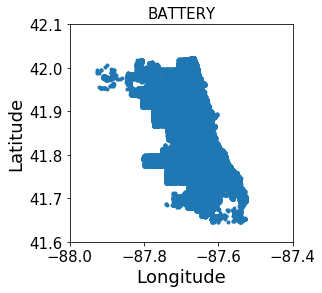

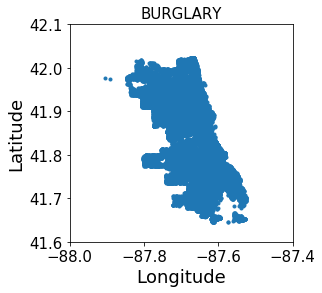

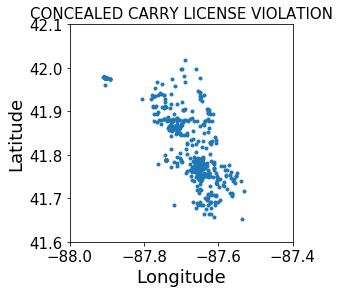

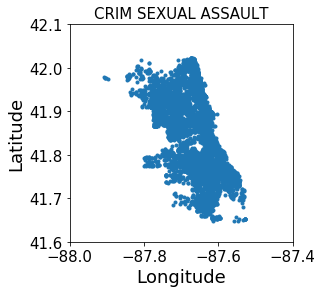

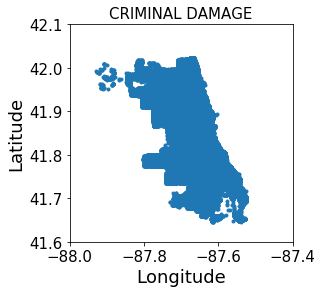

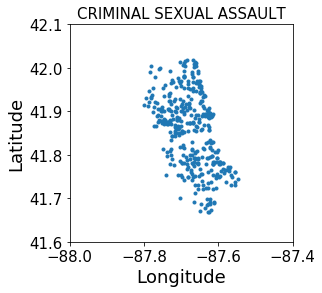

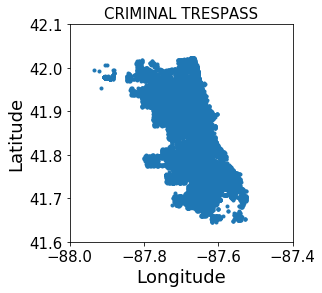

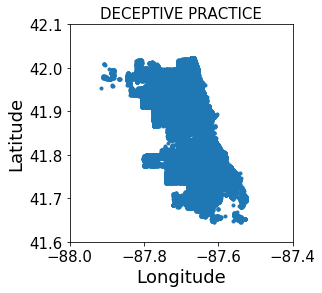

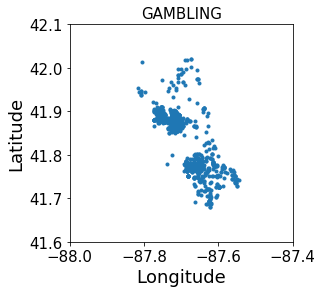

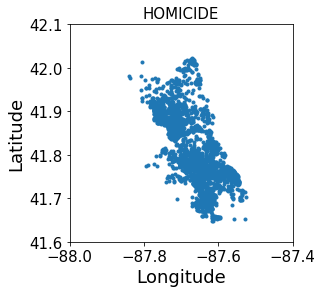

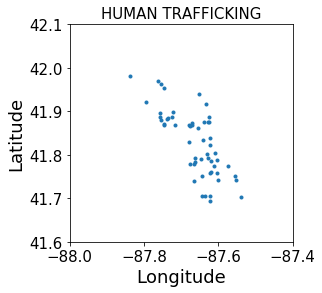

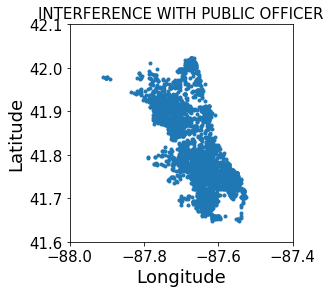

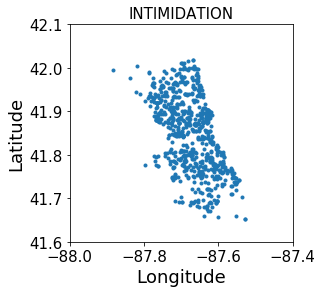

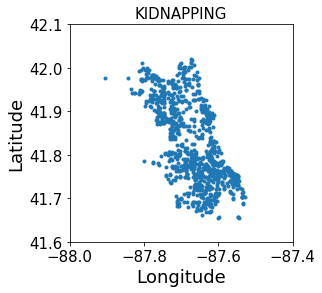

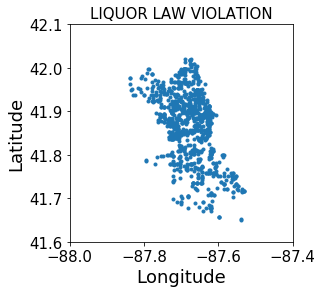

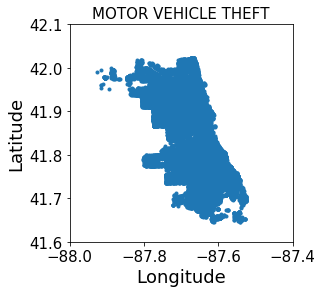

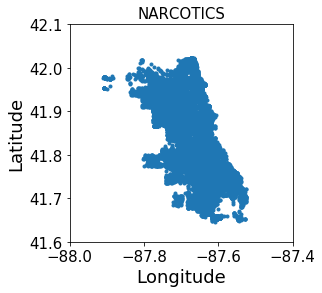

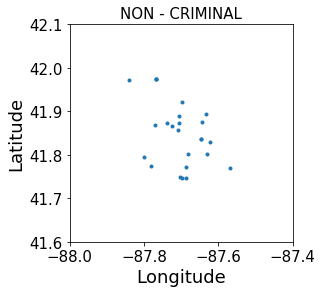

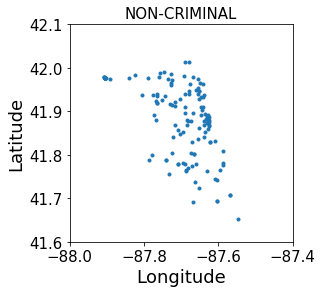

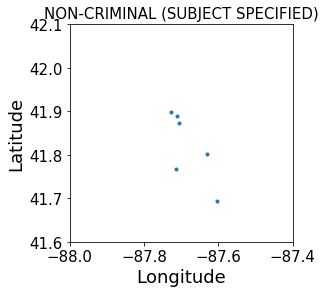

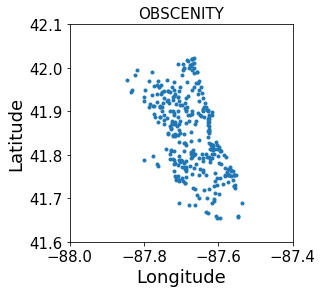

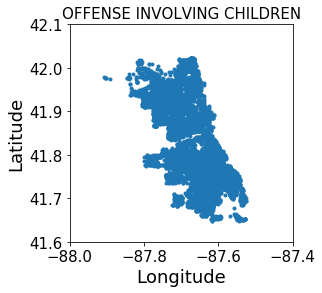

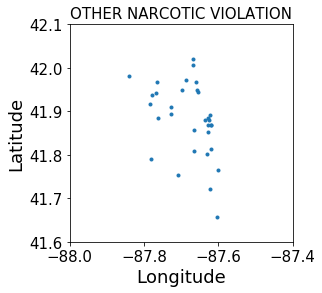

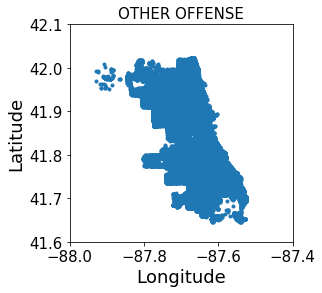

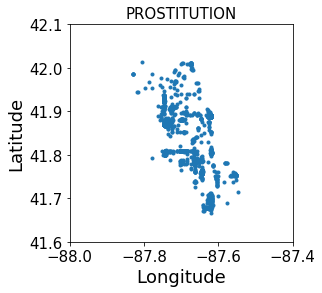

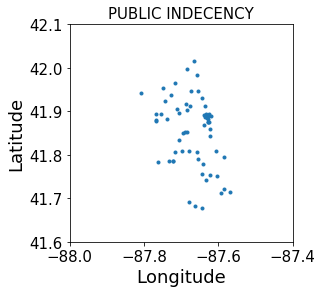

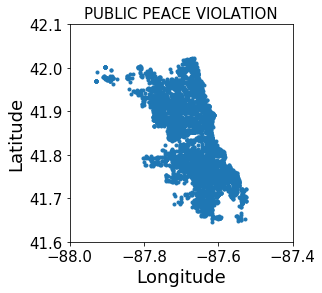

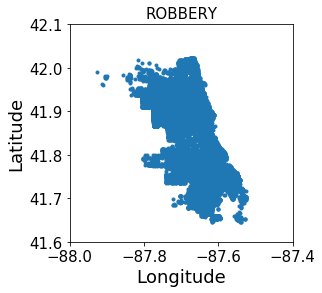

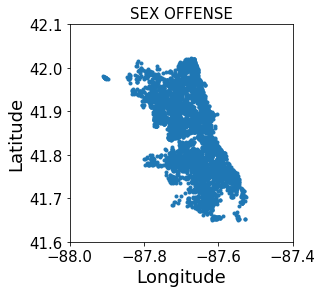

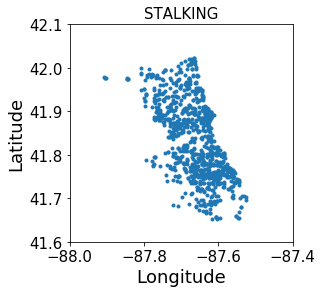

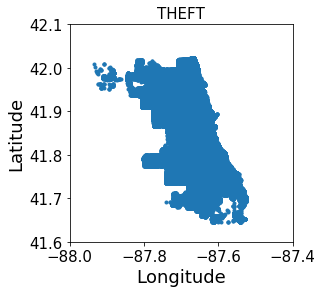

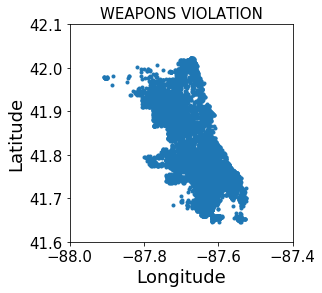

In [25]:
# the location of the crime 
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(Groups[key].Longitude, Groups[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

**Result:**
**In the six sections, we mainly studied the types of crimes. Among them, we can clearly find whether most of the crime types in the past five years are relatively stable. There is one crime: Criminal Sexual Assault. This growth is very large. In terms of rankings, we found that the top 5 were Theft, Battery, Criminal Damage, Assault, Deceptive Practive. Not only that, the location of each crime was drawn in the middle of 2010 and 2015, from these positions we can easily see every All crimes are evenly distributed in Chicago. Therefore, the types of crimes in Chicago are similar in all places, and Criminal Sexual Assault in the past three years are very bad, that is, they are growing very fast**

### 8. Arrest rates per crime type

In [27]:
Crime_Data_Type = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = Crime_Data.index.date, fill_value = 0)

Text(0.5, 0, 'the total number ')

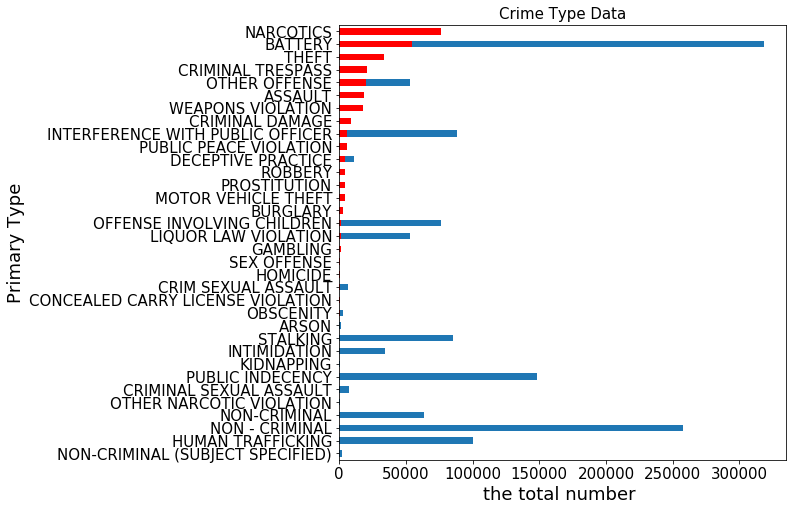

In [28]:
plt.figure(figsize = (8,8))
Crime_Data.groupby(Crime_Data['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().sort_values().plot(kind = 'barh', color = 'r') ## red one is arrest , blue one is not arrest 
plt.title('Crime Type Data')
plt.ylabel("Primary Type")
plt.xlabel("the total number ")

### 9. Arrest rates on all crime type

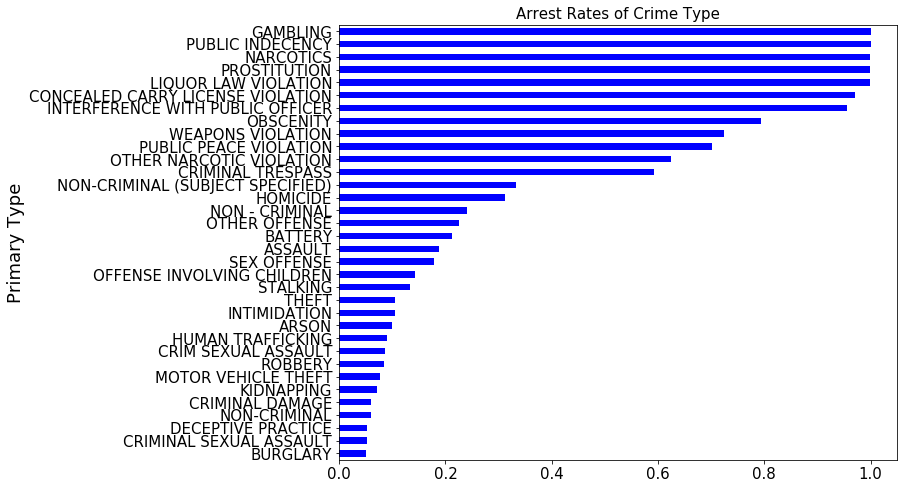

In [29]:
plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'b')
plt.title('Arrest Rates of Crime Type')
plt.show()

**Result:**
**In the eighth and ninth part, the relationship between the crime rate and the accusation rate is studied. In the eighth section, we see that in the same type of crime, the highest proportion of allegations is NARCOTICS, THEFT, CRIMINAL TRESPASS, ASSAULT, WEAPONS VIOLATION, CRIMINAL DAMAGE, ROBBERY, PROSTITUTION, MOTOR VEHICLE THEFT, BURGLARY and GAMBLING. Allegations of these crimes are relatively high. These allegations are 100%. In other words, it is these types of crimes that will be charged. In Part Nine, we observed the rate of the number of arrest. The top five allegations are, GAMBLING, PUBLIC INDECENCY, NARCOTICS, PROSTITUTION, LIQUOR LAW VIOLATION. At the same time, many of these crimes have been accused. In other words, there are a large number of these criminal charges**

### 10 . More details 

In [30]:
A = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
mean_A = Crime_Data['Arrest'].sum() / Crime_Data.shape[0]
stderr_A = np.std(A) / (Crime_Data_Type.shape[1]) ** (1/2.0)


high_A = mean_A + 1.96 * stderr_A
low_A = mean_A - 1.96 * stderr_A
print(A)
print("Average Arrest rate is 95% between (", low_A, ",", high_A, ")")

Primary Type
ARSON                                0.100000
ASSAULT                              0.187982
BATTERY                              0.212272
BURGLARY                             0.050508
CONCEALED CARRY LICENSE VIOLATION    0.970480
CRIM SEXUAL ASSAULT                  0.087050
CRIMINAL DAMAGE                      0.060328
CRIMINAL SEXUAL ASSAULT              0.052219
CRIMINAL TRESPASS                    0.593075
DECEPTIVE PRACTICE                   0.052364
GAMBLING                             1.000000
HOMICIDE                             0.311878
HUMAN TRAFFICKING                    0.090909
INTERFERENCE WITH PUBLIC OFFICER     0.955925
INTIMIDATION                         0.104497
KIDNAPPING                           0.070907
LIQUOR LAW VIOLATION                 0.998401
MOTOR VEHICLE THEFT                  0.077623
NARCOTICS                            0.999594
NON - CRIMINAL                       0.240000
NON-CRIMINAL                         0.059259
NON-CRIMINAL (SUBJECT

In [31]:
for i in range(len(A)):
    if (A[i] <= low_A or A[i] >= high_A):
        print(A.index[i], A[i])

BURGLARY 0.050507914008977084
CONCEALED CARRY LICENSE VIOLATION 0.9704797047970479
CRIM SEXUAL ASSAULT 0.08705026276782105
CRIMINAL DAMAGE 0.06032753672125612
CRIMINAL SEXUAL ASSAULT 0.05221932114882506
CRIMINAL TRESPASS 0.5930745924109075
DECEPTIVE PRACTICE 0.05236421389450082
GAMBLING 1.0
HUMAN TRAFFICKING 0.09090909090909091
INTERFERENCE WITH PUBLIC OFFICER 0.9559254122360918
KIDNAPPING 0.07090719499478623
LIQUOR LAW VIOLATION 0.9984012789768185
MOTOR VEHICLE THEFT 0.07762266551891912
NARCOTICS 0.9995935918613493
NON-CRIMINAL 0.05925925925925926
OBSCENITY 0.7932098765432098
OTHER NARCOTIC VIOLATION 0.625
PROSTITUTION 0.9995388517408347
PUBLIC INDECENCY 1.0
PUBLIC PEACE VIOLATION 0.7006582746275551
ROBBERY 0.08353632054985932
WEAPONS VIOLATION 0.7236425614803993


## Machine Learning - Prediction model

In [33]:
data =  pd.read_csv("crimes_2015_2020.csv" , na_values = [None, 'NaN','Nothing'], header = 0) # the data is the 2015 data to 2020 
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10179775,HY368117,01/01/2015 12:00:00 AM,022XX S SAWYER AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,12.0,30.0,02,1155042.0,1888945.0,2015,04/04/2020 03:44:34 PM,41.851074,-87.70645,"(41.851074338, -87.706449961)"
1,11768614,JC361321,01/01/2015 12:00:00 AM,030XX W 41ST ST,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,12.0,58.0,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
2,11752913,JC342515,01/01/2015 12:00:00 AM,030XX W 41ST ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,12.0,58.0,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
3,11993485,JD166700,01/01/2015 12:00:00 AM,095XX S BENNETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,7.0,51.0,11,NaN,NaN,2015,02/28/2020 03:48:46 PM,NaN,NaN,NaN
4,11269813,JB195608,01/01/2015 12:00:00 AM,029XX N LOWELL AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,31.0,20.0,02,NaN,NaN,2015,02/25/2020 03:47:28 PM,NaN,NaN,NaN


In [34]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [35]:
data = data.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Beat', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'])

In [36]:
data.head()

,Date,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code
0,01/01/2015 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,APARTMENT,False,True,10.0,12.0,30.0,02
1,01/01/2015 12:00:00 AM,OFFENSE INVOLVING CHILDREN,APARTMENT,False,True,9.0,12.0,58.0,17
2,01/01/2015 12:00:00 AM,OFFENSE INVOLVING CHILDREN,APARTMENT,False,False,9.0,12.0,58.0,17
3,01/01/2015 12:00:00 AM,DECEPTIVE PRACTICE,RESIDENCE,False,False,4.0,7.0,51.0,11
4,01/01/2015 12:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,True,25.0,31.0,20.0,02


In [37]:
X = data.drop(columns=['Arrest'])
y = data['Arrest']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'SIDEWALK'